## Scraping Data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f'Scraping page {i}')
    
    url = f'{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'
    
    response = requests.get(url)
    content = response.text
    parsed_content = BeautifulSoup(content, 'lxml')
    for para in parsed_content.find_all("div", class_ = "text_content"):
        reviews.append(para.get_text())

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


In [4]:
df.reviews = df.reviews.str.split('|', expand =True)[1]
df

,reviews
0,Easy check in a T5. Galleries south and Nort...
1,"Flight delayed by an hour, it happens, no bi..."
2,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...
4,Failed at all basic travel fundamentals: 1) O...
...,...
995,Johannesburg to London. I tend to stay with ...
996,Singapore to London Heathrow. It's my first ...
997,London to Los Angeles. Booked this trip eigh...
998,Miami to London Heathrow. As with many other...


## Processing Data

In [5]:
import re

def clean(text):
    text = re.sub('[^a-zA-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df.reviews.apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...


In [6]:
import nltk
nltk.download("punkt")

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Raghav
[nltk_data]     Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Raghav
[nltk_data]     Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Raghav
[nltk_data]     Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N': wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist
    
df["POS Tagged"] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Raghav
[nltk_data]     Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Raghav Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS Tagged
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam..."


In [9]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_raw = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_raw = lemma_raw + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_raw = lemma_raw + " " + lemma
    return lemma_raw

df["Lemma"] = df["POS Tagged"].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS Tagged,Lemma
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...


In [10]:
!pip install VaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     ------------------- ------------------- 61.4/126.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vaderSentimentAnalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs["compound"]

df["Sentiment"] = df["Lemma"].apply(vaderSentimentAnalysis)

def vaderAnalysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df["Sentiment"].apply(vaderAnalysis)
df.head()

,reviews,Cleaned Reviews,POS Tagged,Lemma,Sentiment,Analysis
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...,0.9415,Positive
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...,-0.2235,Negative
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...,-0.7698,Negative
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...,0.9420,Positive
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...,-0.9019,Negative


In [12]:
vader_counts = df["Analysis"].value_counts()
vader_counts

Positive    496
Negative    399
Neutral     105
Name: Analysis, dtype: int64

## Visual Representation

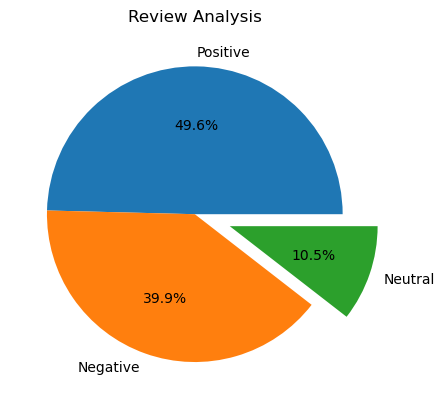

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Review Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0,0,0.25), autopct= '%1.1f%%');

## WordCloud

In [24]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/151.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 2.3 MB/s eta 0:00:00


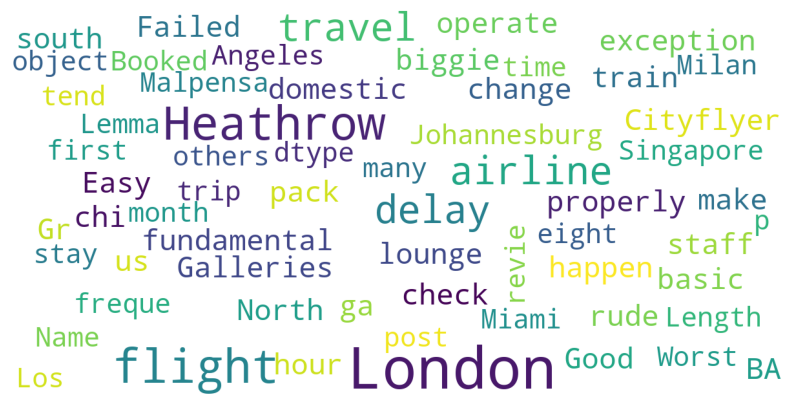

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)
    
    wordcloud = wordcloud.generate(str(data))
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.imshow(wordcloud)
    
show_wordcloud(df.Lemma)